In [ ]:
import cv2
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Step 1: Load the image
image = cv2.imread('path_to_image.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert from BGR (OpenCV default) to RGB

# Step 2: Reshape the image to a 2D array of pixels
pixel_values = image.reshape((-1, 3))  # Each pixel is a vector of R, G, B
pixel_values = np.float32(pixel_values)  # Convert to float

# Step 3: Define criteria and number of clusters (K)
k = 4  # You can adjust the number of clusters for segmentation
kmeans = KMeans(n_clusters=k, random_state=42)

# Step 4: Perform k-means clustering
kmeans.fit(pixel_values)
labels = kmeans.labels_  # Labels of each pixel
centers = kmeans.cluster_centers_  # RGB values of the centers

# Step 5: Convert centers to uint8 (as pixels must be in this format)
centers = np.uint8(centers)

# Step 6: Map each pixel to the color of the centroid of its cluster
segmented_image = centers[labels.flatten()]

# Step 7: Reshape back to the original image shape
segmented_image = segmented_image.reshape(image.shape)

# Display the original and segmented images
plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.imshow(segmented_image)
plt.title('Segmented Image with K-Means')
plt.show()


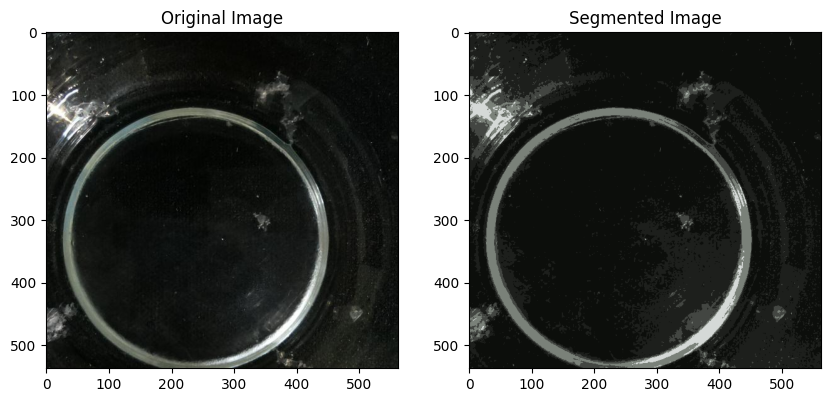

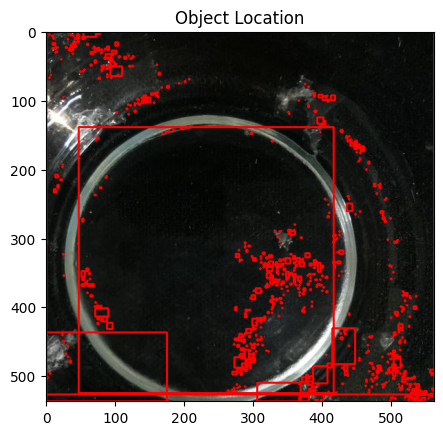

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Load the image
image_path = r'C:\Users\dhruv\Downloads\CV_lab\Rename.jpg'

image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Reshape image to a 2D array of pixels and 3 color values (RGB)
pixel_values = image_rgb.reshape((-1, 3))
pixel_values = np.float32(pixel_values)  # Convert to float

# K-means parameters
k = 5  # Number of clusters
max_iters = 100  # Maximum iterations for convergence

# Step 2: Initialize centroids randomly from the image pixels
np.random.seed(42)
centroids = pixel_values[np.random.choice(pixel_values.shape[0], k, replace=False)]

# Step 3: Function to compute the Euclidean distance
def compute_distance(a, b):
    return np.linalg.norm(a - b, axis=1)

# Step 4: K-means algorithm
for i in range(max_iters):
    # Step 4.1: Assign each pixel to the nearest centroid
    distances = np.array([compute_distance(pixel_values, centroid) for centroid in centroids])
    clusters = np.argmin(distances, axis=0)

    # Step 4.2: Calculate new centroids by averaging the pixel values of each cluster
    new_centroids = np.array([pixel_values[clusters == j].mean(axis=0) for j in range(k)])

    # Step 4.3: Check for convergence (if centroids do not change)
    if np.all(new_centroids == centroids):
        break

    centroids = new_centroids

# Step 5: Replace each pixel with its cluster's centroid
segmented_image = centroids[clusters].reshape(image_rgb.shape).astype(np.uint8)

# Display the segmented image
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(segmented_image)
plt.title('Segmented Image')

plt.show()

# Step 6: Find the location of the object
# Assuming the object is in the cluster with the lowest centroid value (darker region)
object_cluster = np.argmin(np.mean(centroids, axis=1))  # This identifies the cluster that represents the object

# Create a mask for the object cluster
mask = (clusters == object_cluster).reshape(image_rgb.shape[:2])

# Find the contours of the object to locate it
contours, _ = cv2.findContours(mask.astype(np.uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)
    cv2.rectangle(image_rgb, (x, y), (x + w, y + h), (255, 0, 0), 2)  # Draw a rectangle around the object

# Display the original image with the object location
plt.imshow(image_rgb)
plt.title('Object Location')
plt.show()
